In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Read top five values

df = pd.read_csv("Car_sales.csv")

df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15


In [4]:
# 2. Print dataframe info_data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    float64
 6   Engine size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb weight          155 non-null    float64
 12  Fuel capacity        156 non-null    float64
 13  Fuel efficiency      154 non-null    float64
 14  Latest Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

In [5]:
# 3. Print number of rows and columns

print(df.shape[0], df.shape[1])


157 15


In [6]:
# 4. Drop duplicate rows_if any

df.drop_duplicates(inplace=True)
print(df)

      Manufacturer              Model  Sales in thousands  \
0    Acura          Integra                        16.919   
1    Acura          TL                             39.384   
2    Acura          CL                             14.114   
3    Acura          RL                              8.588   
4    Audi           A4                             20.397   
..             ...                ...                 ...   
152  Volvo          V40                             3.545   
153  Volvo          S70                            15.245   
154  Volvo          V70                            17.531   
155  Volvo          C70                             3.493   
156  Volvo          S80                            18.969   

     4-year resale value Vehicle type  Price in thousands  Engine size  \
0                 16.360    Passenger               21.50          1.8   
1                 19.875    Passenger               28.40          3.2   
2                 18.225    Passenger        

In [7]:
# 5. Print number of rows and columns after dropping duplicates

print(df.shape[0], df.shape[1])

157 15


In [8]:
# 6. Print summary statistics for numerical variables

print(df.describe())

       Sales in thousands  4-year resale value  Price in thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000 

In [9]:
# 7. Print number of missing values in each column

ls = df.isnull().sum()

print(ls)

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64


In [10]:
# 8. Drop the column with most missing values

col_name = df.isnull().sum().idxmax() # idxmax will return the column name which is having a maximum missing values

df.drop(col_name, axis=1, inplace=True)

print(df)


      Manufacturer              Model  Sales in thousands Vehicle type  \
0    Acura          Integra                        16.919    Passenger   
1    Acura          TL                             39.384    Passenger   
2    Acura          CL                             14.114    Passenger   
3    Acura          RL                              8.588    Passenger   
4    Audi           A4                             20.397    Passenger   
..             ...                ...                 ...          ...   
152  Volvo          V40                             3.545    Passenger   
153  Volvo          S70                            15.245    Passenger   
154  Volvo          V70                            17.531    Passenger   
155  Volvo          C70                             3.493    Passenger   
156  Volvo          S80                            18.969    Passenger   

     Price in thousands  Engine size  Horsepower  Wheelbase  Width  Length  \
0                 21.50          

In [ ]:
# 9. Drop the rows with categorical missing values

categorical_cols = df.select_dtypes(include=['object']).columns
missing_rows = df[df[categorical_cols].isnull().any(axis=1)]  # Get rows where any categorical column has NaN
dummy = df.dropna(subset=categorical_cols,inplace=True)  # Drop rows with categorical missing values

print(df)

      Manufacturer              Model  Sales in thousands Vehicle type  \
0    Acura          Integra                        16.919    Passenger   
1    Acura          TL                             39.384    Passenger   
2    Acura          CL                             14.114    Passenger   
3    Acura          RL                              8.588    Passenger   
4    Audi           A4                             20.397    Passenger   
..             ...                ...                 ...          ...   
152  Volvo          V40                             3.545    Passenger   
153  Volvo          S70                            15.245    Passenger   
154  Volvo          V70                            17.531    Passenger   
155  Volvo          C70                             3.493    Passenger   
156  Volvo          S80                            18.969    Passenger   

     Price in thousands  Engine size  Horsepower  Wheelbase  Width  Length  \
0                 21.50          

In [ ]:
# 10. Import the rows with numerical missing values

missing_row = df.select_dtypes(include='number').columns

missing_data = df[df[missing_row].isnull().any(axis = 1)]

print(missing_data)

      Manufacturer              Model  Sales in thousands Vehicle type  \
2    Acura          CL                             14.114    Passenger   
15   Cadillac       Seville                        15.943    Passenger   
33   Chrysler       Town & Country                 53.480          Car   
38   Dodge          Intrepid                       88.028    Passenger   
109  Oldsmobile     Intrigue                       38.554    Passenger   

     Price in thousands  Engine size  Horsepower  Wheelbase  Width  Length  \
2                   NaN          3.2       225.0      106.9   70.6   192.0   
15               44.475          4.6       275.0      112.2   75.0   201.0   
33                  NaN          NaN         NaN        NaN    NaN     NaN   
38               22.505          2.7       202.0      113.0   74.7   203.7   
109              24.150          3.5       215.0      109.0   73.6   195.9   

     Curb weight  Fuel capacity  Fuel efficiency Latest Launch  
2          3.470     

In [89]:
# 11. Sort the data w.r.t price_find the details of the most and the least expensive cars

prcing_values = df.sort_values(by='Price in thousands',ascending=True)

ls_values = prcing_values['Price in thousands']

print(prcing_values['Price in thousands'].head(1))
print(prcing_values['Price in thousands'].tail(3))

# how to traverse from back of data using loops
maxi = 0
for i in ls_values:
    maxi = max(maxi , i)

print(maxi)

26    9.235
Name: Price in thousands, dtype: float64
99    85.5
2      NaN
33     NaN
Name: Price in thousands, dtype: float64
85.5


In [90]:
# 12. Write a function to find min and max values of any column

def min_max(df,column):
    return df[column].min(),df[column].max()

print(min_max(df,'Price in thousands'))

(np.float64(9.235), np.float64(85.5))


In [93]:
# 13. Call the above function to find min max of horsepower, length, fuel efficiency

print(min_max(df,'Horsepower'))
print(min_max(df,'Length'))
print(min_max(df,'Fuel efficiency'))

(np.float64(55.0), np.float64(450.0))
(np.float64(149.4), np.float64(224.5))
(np.float64(15.0), np.float64(45.0))


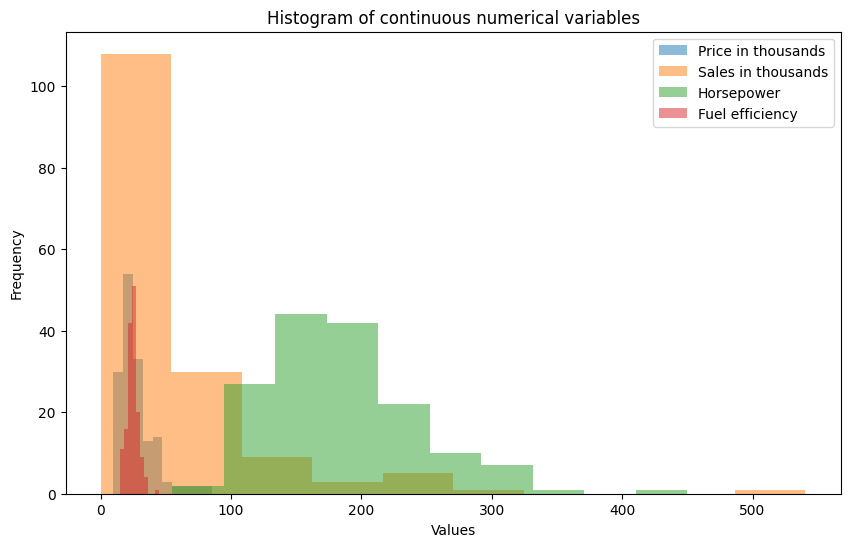

In [109]:
# 14. Plot histogram of continuous numerical variable : price,sales,hoursepower,fuelefficiency

col_names = ['Price in thousands','Sales in thousands','Horsepower','Fuel efficiency']

plt.figure(figsize=(10, 6))

for col in col_names:
    plt.hist(df[col].dropna(),bins=10,label=col,alpha=0.5)

plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of continuous numerical variables')
plt.show()


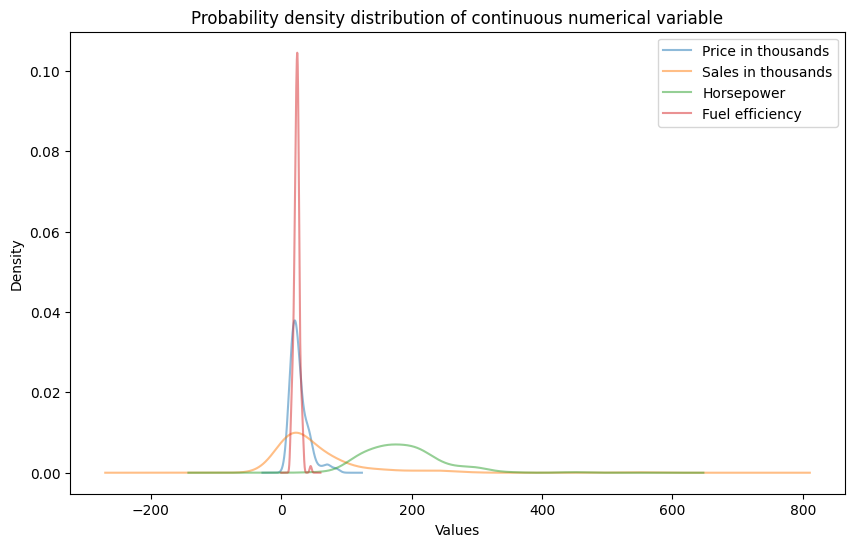

In [111]:
# 15. Probability density distribution of continuous numerical variable-length

plt.figure(figsize=(10, 6))

for col in col_names:
    df[col].plot(kind='kde', label=col, alpha=0.5)

plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability density distribution of continuous numerical variable')
plt.show()

In [112]:
# 16. Count by category –group by manufacture

ls = df.groupby('Manufacturer').size()
print(ls)

Manufacturer
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
dtype: int64


In [114]:
# 17. Select all numerical variables

numerical_varibles = df.select_dtypes(include='number').columns
print(numerical_varibles)

Index(['Sales in thousands', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency'],
      dtype='object')


In [115]:
# 18. Print correlation coefficient value of price and sales

corr_value = df['Price in thousands'].corr(df['Sales in thousands'])
print(corr_value)

coeff_value = df['Sales in thousands'].corr(df['Price in thousands'])
print(coeff_value)

-0.3047344541294122
-0.30473445412941225


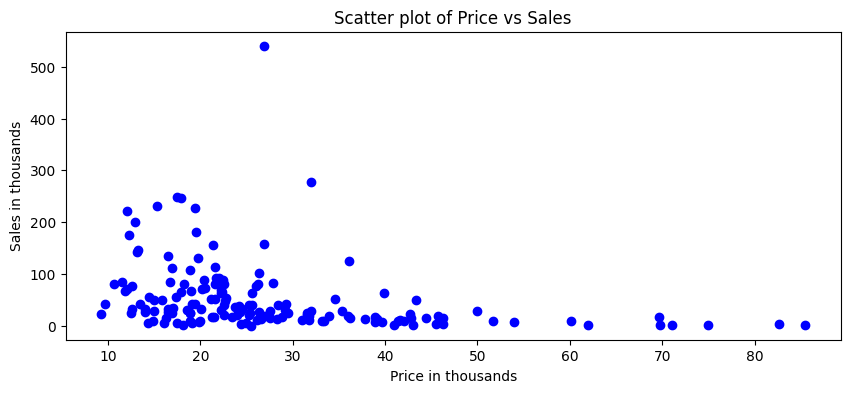

In [ ]:
# 19. Plot correlation of price and sales using scatterplot

df_filtered = df[['Price in thousands','Sales in thousands']].dropna()

plt.figure(figsize=(10, 4))

plt.scatter(df_filtered['Price in thousands'],df_filtered['Sales in thousands'],color = 'blue')

plt.xlabel('Price in thousands')
plt.ylabel('Sales in thousands')
plt.title('Scatter plot of Price vs Sales')

plt.show()

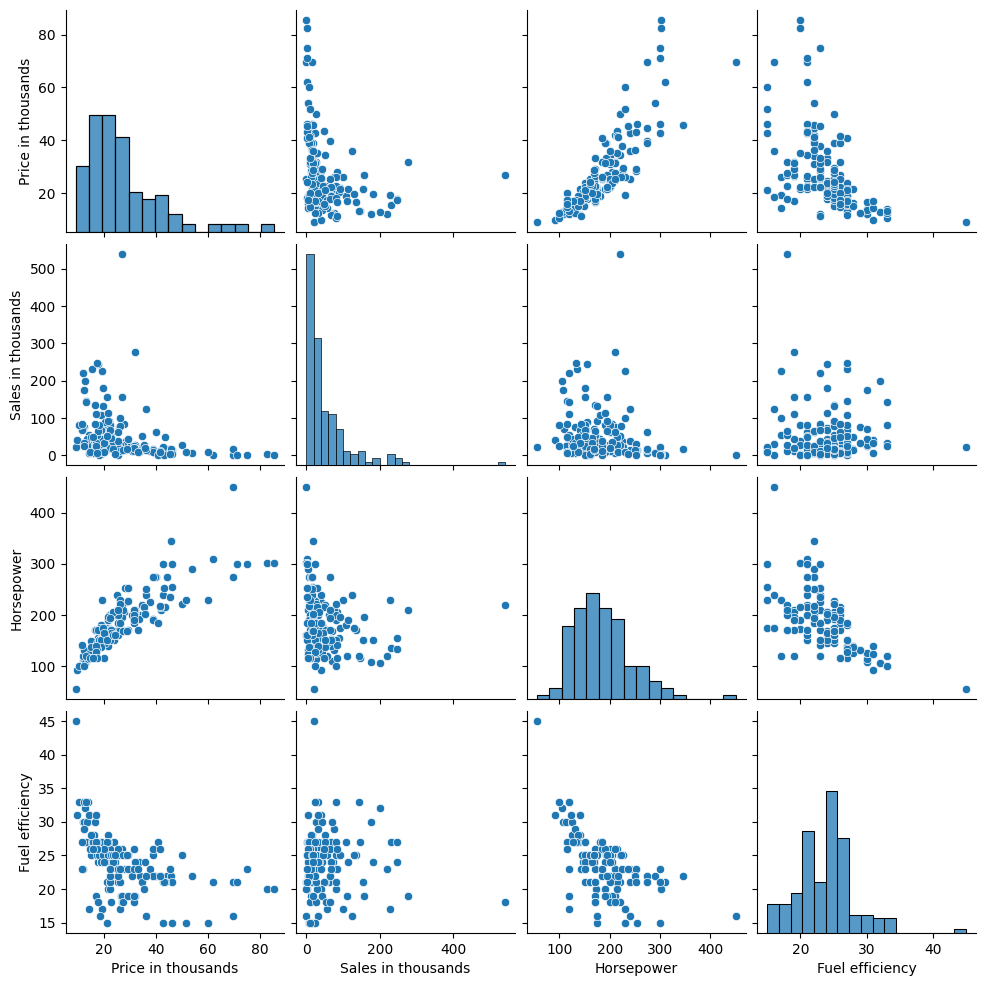

In [123]:
# 20.Pair plot

import seaborn as sns

col_names = ['Price in thousands','Sales in thousands','Horsepower','Fuel efficiency']
sns.pairplot(df[col_names].dropna())

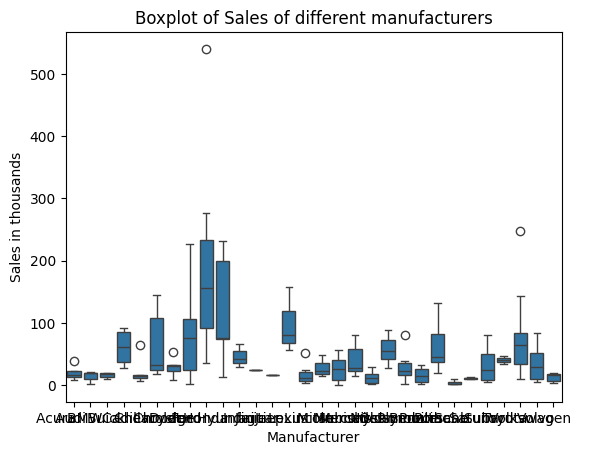

In [126]:
# 21. Boxplot of sales of different manufacturer

sns.boxplot(x='Manufacturer',y='Sales in thousands',data=df)

plt.title('Boxplot of Sales of different manufacturers')

plt.show()

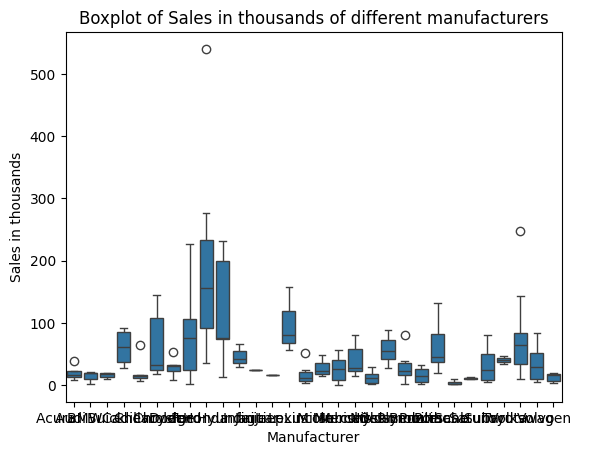

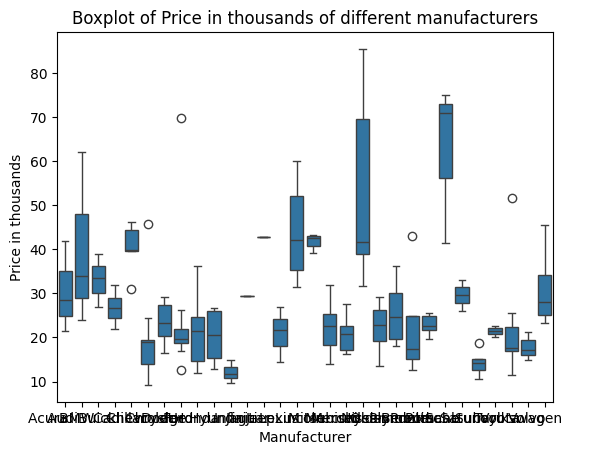

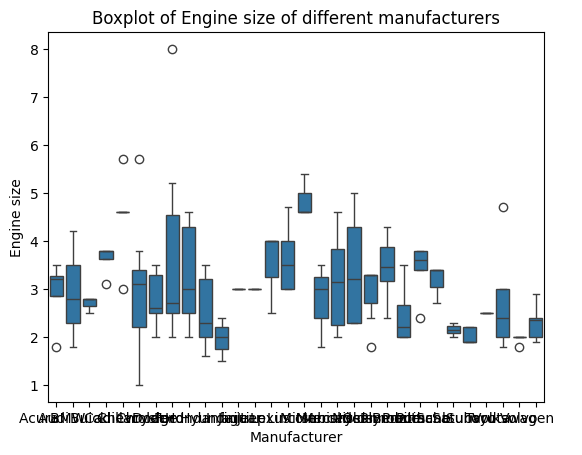

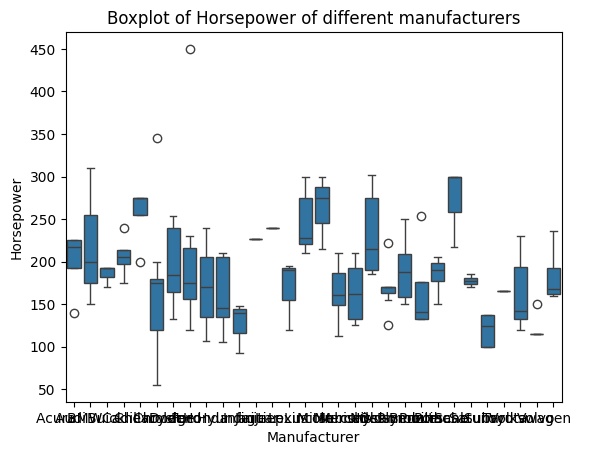

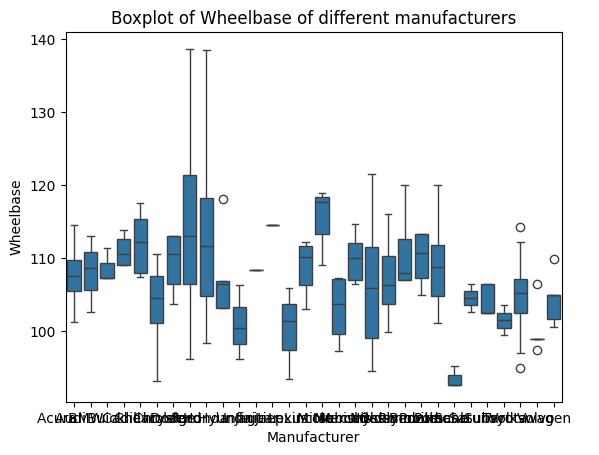

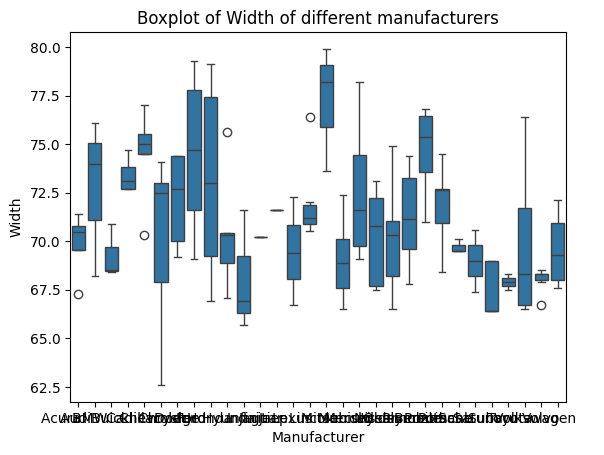

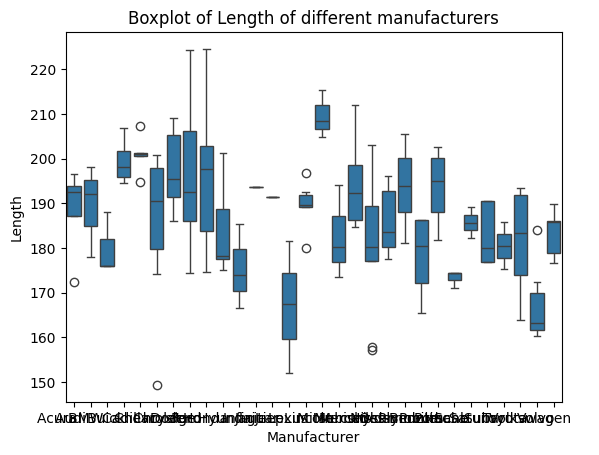

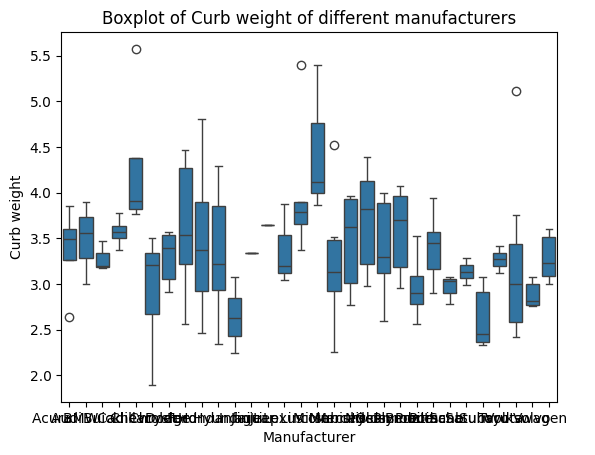

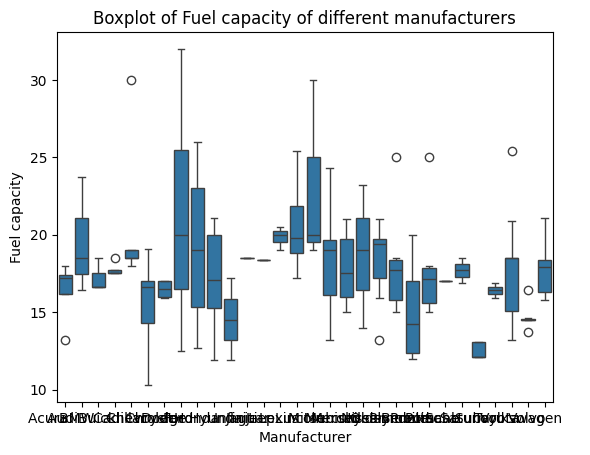

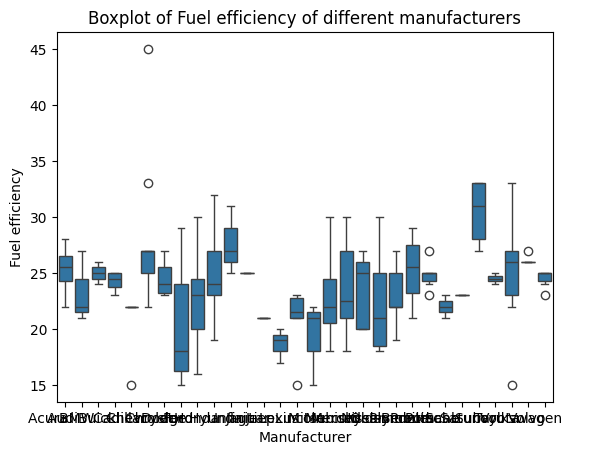

In [128]:
# 22. Boxplot of other numerical variables w.r.t manufacture

numerical_varibles = df.select_dtypes(include='number').columns

for col in numerical_varibles:
    sns.boxplot(x='Manufacturer',y=col,data=df)
    plt.title(f'Boxplot of {col} of different manufacturers')
    plt.show()

In [130]:
# 23. Divide the data into input and output y=sales in thousand, x=all other variables

X = df.drop(columns='Sales in thousands')
y = df['Sales in thousands']

print(X.head())
print(y.head())

    Manufacturer              Model Vehicle type  Price in thousands  \
0  Acura          Integra              Passenger               21.50   
1  Acura          TL                   Passenger               28.40   
2  Acura          CL                   Passenger                 NaN   
3  Acura          RL                   Passenger               42.00   
4  Audi           A4                   Passenger               23.99   

   Engine size  Horsepower  Wheelbase  Width  Length  Curb weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel capacity  Fuel efficiency Latest Launch  
0           13.2             28.0      2-Feb-14  
1           17.2             25.0      6-Mar-15  
2 

In [136]:
# 24. Encode other categorical variables using label encoder

from sklearn.preprocessing import LabelEncoder

column_names = X.select_dtypes(include='object').columns

label = {}

for col in column_names:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label[col] = le

print(X.head(5))

# revers for original values

for col in column_names:
    X[col] = label[col].inverse_transform(X[col])

print(df.head(5))

   Manufacturer  Model  Vehicle type  Price in thousands  Engine size  \
0             0     79             1               21.50          1.8   
1             0    143             1               28.40          3.2   
2             0     25             1                 NaN          3.2   
3             0    115             1               42.00          3.5   
4             1      8             1               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb weight  Fuel capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel efficiency  Latest Launch  
0             28.0             42  
1             25.0            112  
2             26.0        

In [ ]:
# 25. Encode categorical variable vehicle type using one-hot encoder

X = pd.get_dummies(X,columns=['Vehicle type'],drop_first = True)
X.head()

,Manufacturer,Model,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Vehicle type_1
0,0,79,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,42,True
1,0,143,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,112,True
2,0,25,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,0,True
3,0,115,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,94,True
4,1,8,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2,True


In [ ]:
# 26.Split the data set into train and test set 70% train set 10% test set

from sklearn.model_selection import train_test_split

x = df.drop(columns='Sales in thousands')
y = df['Sales in thousands']

X_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state=42)
X_test, _, y_test, _ = train_test_split(x_temp, y_temp,test_size=2/3, random_state=42)

# X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(109, 13) (109,)
(16, 13) (16,)


In [165]:
# 27. Apply feature scaling on numerical variables

from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

numerical_varibles = X.select_dtypes(include='number').columns

X[numerical_varibles] = scaler.fit_transform(X[numerical_varibles])
# X[numerical_varibles] = min_max_scaler.fit_transform(X[numerical_varibles])

print(X.head())

   Manufacturer     Model  Price in thousands  Engine size  Horsepower  \
0     -1.694221  0.029623           -0.411789    -1.210889   -0.812988   
1     -1.694221  1.453800            0.070551     0.133586    0.690949   
2     -1.694221 -1.172026                 NaN     0.133586    0.690949   
3     -1.694221  0.830723            1.021248     0.421687    0.425549   
4     -1.577506 -1.550323           -0.237727    -1.210889   -0.636055   

   Wheelbase     Width    Length  Curb weight  Fuel capacity  Fuel efficiency  \
0  -0.825439 -1.118929 -1.116140    -1.175923      -1.226164         0.973544   
1   0.080457 -0.247036  0.415009     0.221133      -0.194023         0.270767   
2  -0.077090 -0.159847  0.347788     0.146347      -0.194023         0.505026   
3   0.933837  0.072658  0.691363     0.750996       0.012406        -0.432010   
4  -0.641634 -0.857361 -0.697875    -0.604689      -0.400451         0.739285   

   Latest Launch  Vehicle type_1  
0      -0.628166            True 

In [ ]:
# the end